<a href="https://colab.research.google.com/github/sudiptaproggaislam/Research/blob/master/BengaliDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import tensorflow as tf
import math
import shutil ## move files from one folder to another

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/BengaliBMP.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Augmentor.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()

In [ ]:
def copy_img():
    source_folder = r"./BengaliBMP/"

    if not os.path.exists("./Data/"):
        os.mkdir("./Data/")

        for num in range(0,10):
            os.makedirs("./Data/"+str(num)+"/")

            for file_name in os.listdir(source_folder):

                source = source_folder + file_name
                destination = r"./Data/"+str(num)+"/" + file_name
                
                if os.path.splitext(file_name)[0][-1]==str(num):
                    if os.path.isfile(source):
                        shutil.copy(source, destination)
                        # print('Copied:', file_name)
    else:
        print("folder already exist")
copy_img()

In [ ]:
def move_from_output(number):
    source_folder = r"./Data/"+str(number)+"/output/"

    for file_name in os.listdir(source_folder):

        source = source_folder + file_name
        destination = r"./Data/"+str(number)+"/"+ file_name
        if os.path.isfile(source):
            shutil.move(source, destination)
            # print('Copied:', file_name)
    shutil.rmtree(source_folder)

import Augmentor
for num in range(0,10):
    p = Augmentor.Pipeline("./Data/"+str(num))
    p.random_distortion(probability=0.4, grid_width=4, grid_height=4, magnitude=4)
    p.rotate(probability=0.4, max_left_rotation=3, max_right_rotation=3)
    p.sample(500)
    move_from_output(num)

Initialised with 600 image(s) found.
Output directory set to ./Data/0/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B7040D0>: 100%|██████████| 500/500 [00:01<00:00, 374.88 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/1/output.

Processing <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=32x32 at 0x7F7C9B67FF40>: 100%|██████████| 500/500 [00:01<00:00, 314.32 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/2/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B641E20>: 100%|██████████| 500/500 [00:01<00:00, 346.18 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/3/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B4747F0>: 100%|██████████| 500/500 [00:01<00:00, 357.13 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/4/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B67C760>: 100%|██████████| 500/500 [00:01<00:00, 331.32 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/5/output.

Processing <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=32x32 at 0x7F7C9B6376D0>: 100%|██████████| 500/500 [00:01<00:00, 301.44 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/6/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B67DA30>: 100%|██████████| 500/500 [00:01<00:00, 272.12 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/7/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B449EB0>: 100%|██████████| 500/500 [00:02<00:00, 208.12 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/8/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B6A7610>: 100%|██████████| 500/500 [00:02<00:00, 213.63 Samples/s]


Initialised with 600 image(s) found.
Output directory set to ./Data/9/output.

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F7C9B760370>: 100%|██████████| 500/500 [00:01<00:00, 349.86 Samples/s]


In [ ]:
# Count the number of images in the respective classes

ROOT_DIR = "./Data/"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()


dict_items([('9', 1100), ('2', 1100), ('0', 1100), ('8', 1100), ('7', 1100), ('5', 1100), ('1', 1100), ('3', 1100), ('6', 1100), ('4', 1100)])

In [ ]:
# 70% for Train data, 15% for Validation, 15% for Testing

## Create folders

def dataFolder(p, split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), 
                                  size = (math.floor(split*number_of_images[dir])-5), replace=False):
        O = os.path.join(ROOT_DIR,dir,img) #Path
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} The folder exists!")


In [ ]:
dataFolder('TRAIN',0.7)
dataFolder('VALIDATION',0.15)
dataFolder('TEST',0.15)

In [ ]:
## MODEL BUILD
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Concatenate, Average
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate, BatchNormalization

# define input shape
input_shape = (28, 28, 1)

# define input layer
inputs = Input(shape=input_shape)

# define three convolutional paths
path1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
path1 = Conv2D(32, (3, 3), activation='relu', padding='same')(path1)
path1 = MaxPooling2D(pool_size=(2, 2))(path1)
path1 = Dropout(0.25)(path1)

path11 = Conv2D(64, (3, 3), activation='relu', padding='same')(path1)
path11 = BatchNormalization()(path11)
path11 = Conv2D(64, (3, 3), activation='relu', padding='same')(path11)
path11 = BatchNormalization()(path11)
path11 = MaxPooling2D(pool_size=(2, 2))(path11)
path11 = Dropout(0.20)(path11)

path12 = Conv2D(64, (3, 3), activation='relu', padding='same')(path1)
path12 = Conv2D(64, (3, 3), activation='relu', padding='same')(path12)
path12 = MaxPooling2D(pool_size=(2, 2))(path12)
path12 = Dropout(0.25)(path12)

path13 = Conv2D(128, (3, 3), activation='relu', padding='same')(path1)
path13 = BatchNormalization()(path13)
path13 = Conv2D(128, (3, 3), activation='relu', padding='same')(path13)
path13 = BatchNormalization()(path13)
path13 = MaxPooling2D(pool_size=(2, 2))(path13)
path13 = Dropout(0.50)(path13)

path1 = concatenate([path11, path12, path13])
path1 = Conv2D(64, (3, 3), activation='relu', padding='same')(path1)
path1 = MaxPooling2D(pool_size=(2, 2))(path1)
path1 = Dropout(0.25)(path1)
path1 = Flatten()(path1)
path1 = Dense(256, activation='relu')(path1)
path1 = Dropout(0.50)(path1)
path1 = Dense(10, activation='softmax')(path1)



path2 = Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
path2 = Conv2D(32, (5, 5), activation='relu', padding='same')(path2)
path2 = MaxPooling2D(pool_size=(2, 2))(path2)
path2 = Dropout(0.25)(path2)

path21 = Conv2D(64, (5, 5), activation='relu', padding='same')(path2)
path21 = BatchNormalization()(path21)
path21 = Conv2D(64, (5, 5), activation='relu', padding='same')(path21)
path21 = BatchNormalization()(path21)
path21 = MaxPooling2D(pool_size=(2, 2))(path21)
path21 = Dropout(0.25)(path21)

path22 = Conv2D(64, (5, 5), activation='relu', padding='same')(path2)
path22 = Conv2D(64, (5, 5), activation='relu', padding='same')(path22)
path22 = MaxPooling2D(pool_size=(2, 2))(path22)
path22 = Dropout(0.25)(path22)

path23 = Conv2D(128, (3, 3), activation='relu', padding='same')(path2)
path23 = BatchNormalization()(path23)
path23 = Conv2D(128, (3, 3), activation='relu', padding='same')(path23)
path23 = BatchNormalization()(path23)
path23 = MaxPooling2D(pool_size=(2, 2))(path23)
path23 = Dropout(0.50)(path23)

path2 = concatenate([path21, path22, path23])
path2 = Conv2D(64, (5, 5), activation='relu', padding='same')(path2)
path2 = MaxPooling2D(pool_size=(2, 2))(path2)
path2 = Dropout(0.25)(path2)
path2 = Flatten()(path2)
path2 = Dense(256, activation='relu')(path2)
path2 = Dropout(0.50)(path2)
path2 = Dense(10, activation='softmax')(path2)



path3 = Conv2D(32, (7, 7), activation='relu', padding='same')(inputs)
path3 = Conv2D(32, (7, 7), activation='relu', padding='same')(path3)
path3 = MaxPooling2D(pool_size=(2, 2))(path3)
path3 = Dropout(0.25)(path3)

path31 = Conv2D(64, (7, 7), activation='relu', padding='same')(path3)
path31 = BatchNormalization()(path31)
path31 = Conv2D(64, (7, 7), activation='relu', padding='same')(path31)
path31 = BatchNormalization()(path31)
path31 = MaxPooling2D(pool_size=(2, 2))(path31)
path31 = Dropout(0.25)(path31)

path32 = Conv2D(64, (7, 7), activation='relu', padding='same')(path3)
path32 = Conv2D(64, (7, 7), activation='relu', padding='same')(path32)
path32 = MaxPooling2D(pool_size=(2, 2))(path32)
path32 = Dropout(0.25)(path32)

path33 = Conv2D(128, (3, 3), activation='relu', padding='same')(path3)
path33 = BatchNormalization()(path33)
path33 = Conv2D(128, (3, 3), activation='relu', padding='same')(path33)
path33 = BatchNormalization()(path33)
path33 = MaxPooling2D(pool_size=(2, 2))(path33)
path33 = Dropout(0.50)(path33)

path3 = concatenate([path31, path32, path33])
path3 = Conv2D(64, (7, 7), activation='relu', padding='same')(path3)
path3 = MaxPooling2D(pool_size=(2, 2))(path3)
path3 = Dropout(0.25)(path3)
path3 = Flatten()(path3)
path3 = Dense(256, activation='relu')(path3)
path3 = Dropout(0.50)(path3)
path3 = Dense(10, activation='softmax')(path3)

# average of the three paths
outputs = Average()([path1, path2, path3])

# model
model = Model(inputs = inputs, outputs = outputs)


In [ ]:
## CNN Model
## Building the model - FUNCTIONAL
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate, BatchNormalization
# input layer
inputs = Input(shape=(28, 28, 1))

# three convolutional paths
path1 = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(inputs)
path1 = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(path1)
path1 = MaxPooling2D(pool_size=(2, 2))(path1)
path1 = Dropout(rate = 0.25)(path1)

path11 = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(path1)
path11 = BatchNormalization()(path11)
path11 = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(path11)
path11 = BatchNormalization()(path11)
path11 = MaxPooling2D(pool_size=(2, 2))(path11)
path11 = Dropout(rate = 0.20)(path11)

path12 = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(path1)
path12 = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(path12)
path12 = MaxPooling2D(pool_size=(2, 2))(path12)
path12 = Dropout(rate = 0.25)(path12)

path1 = concatenate([path11, path12])
path1 = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(path1)
path1 = MaxPooling2D(pool_size=(2, 2))(path1)
path1 = Dropout(rate = 0.25)(path1)
path1 = Flatten()(path1)
path1 = Dense(256, activation='relu')(path1)
path1 = Dropout(rate = 0.50)(path1)
path1 = Dense(10, activation='softmax')(path1)



path2 = Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='same')(inputs)
path2 = Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='same')(path2)
path2 = MaxPooling2D(pool_size=(2, 2))(path2)
path2 = Dropout(rate = 0.25)(path2)

path21 = Conv2D(filters = 64, kernel_size = (5, 5), activation='relu', padding='same')(path2)
path21 = BatchNormalization()(path21)
path21 = Conv2D(filters = 64, kernel_size = (5, 5), activation='relu', padding='same')(path21)
path21 = BatchNormalization()(path21)
path21 = MaxPooling2D(pool_size=(2, 2))(path21)
path21 = Dropout(rate = 0.20)(path21)

path22 = Conv2D(filters = 64, kernel_size = (5, 5), activation='relu', padding='same')(path2)
path22 = Conv2D(filters = 64, kernel_size = (5, 5), activation='relu', padding='same')(path22)
path22 = MaxPooling2D(pool_size=(2, 2))(path22)
path22 = Dropout(rate = 0.25)(path22)

path2 = concatenate([path21, path22])
path2 = Conv2D(filters = 64, kernel_size = (5, 5), activation='relu', padding='same')(path2)
path2 = MaxPooling2D(pool_size=(2, 2))(path2)
path2 = Dropout(rate = 0.25)(path2)
path2 = Flatten()(path2)
path2 = Dense(256, activation='relu')(path2)
path2 = Dropout(rate = 0.50)(path2)
path2 = Dense(10, activation='softmax')(path2)



path3 = Conv2D(filters = 32, kernel_size = (7, 7), activation='relu', padding='same')(inputs)
path3 = Conv2D(filters = 32, kernel_size = (7, 7), activation='relu', padding='same')(path3)
path3 = MaxPooling2D(pool_size=(2, 2))(path3)
path3 = Dropout(rate = 0.25)(path3)

path31 = Conv2D(filters = 64, kernel_size = (7, 7), activation='relu', padding='same')(path3)
path31 = BatchNormalization()(path31)
path31 = Conv2D(filters = 64, kernel_size = (7, 7), activation='relu', padding='same')(path31)
path31 = BatchNormalization()(path31)
path31 = MaxPooling2D(pool_size=(2, 2))(path31)
path31 = Dropout(rate = 0.20)(path31)

path32 = Conv2D(filters = 64, kernel_size = (7, 7), activation='relu', padding='same')(path3)
path32 = Conv2D(filters = 64, kernel_size = (7, 7), activation='relu', padding='same')(path32)
path32 = MaxPooling2D(pool_size=(2, 2))(path32)
path32 = Dropout(rate = 0.25)(path32)

path3 = concatenate([path31, path32])
path3 = Conv2D(filters = 64, kernel_size = (7, 7), activation='relu', padding='same')(path3)
path3 = MaxPooling2D(pool_size=(2, 2))(path3)
path3 = Dropout(rate = 0.25)(path3)
path3 = Flatten()(path3)
path3 = Dense(256, activation='relu')(path3)
path3 = Dropout(rate = 0.50)(path3)
path3 = Dense(10, activation='softmax')(path3)

path4 = Conv2D(filters = 32, kernel_size = (9, 9), activation='relu', padding='same')(inputs)
path4 = Conv2D(filters = 32, kernel_size = (9, 9), activation='relu', padding='same')(path4)
path4 = MaxPooling2D(pool_size=(2, 2))(path4)
path4 = Dropout(rate = 0.25)(path4)

path41 = Conv2D(filters = 64, kernel_size = (9, 9), activation='relu', padding='same')(path4)
path41 = BatchNormalization()(path41)
path41 = Conv2D(filters = 64, kernel_size = (9, 9), activation='relu', padding='same')(path41)
path41 = BatchNormalization()(path41)
path41 = MaxPooling2D(pool_size=(2, 2))(path41)
path41 = Dropout(rate = 0.20)(path41)

path42 = Conv2D(filters = 64, kernel_size = (9, 9), activation='relu', padding='same')(path4)
path42 = Conv2D(filters = 64, kernel_size = (9, 9), activation='relu', padding='same')(path42)
path42 = MaxPooling2D(pool_size=(2, 2))(path42)
path42 = Dropout(rate = 0.25)(path42)

path4 = concatenate([path41, path42])
path4 = Conv2D(filters = 64, kernel_size = (9, 9), activation='relu', padding='same')(path4)
path4 = MaxPooling2D(pool_size=(2, 2))(path4)
path4 = Dropout(rate = 0.25)(path4)
path4 = Flatten()(path4)
path4 = Dense(256, activation='relu')(path4)
path4 = Dropout(rate = 0.50)(path4)
path4 = Dense(10, activation='softmax')(path4)

# average of the three paths
outputs = Average()([path1, path2, path3, path4])

# model
model = Model(inputs = inputs, outputs = outputs)

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 28, 28, 32)   832         ['input_1[0][0]']                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 28, 28, 32)   1600        ['input_1[0][0]']                
                                                                                              

In [ ]:
ad = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [ ]:
model.compile(optimizer = ad, loss = 'categorical_crossentropy', metrics = ['accuracy'])

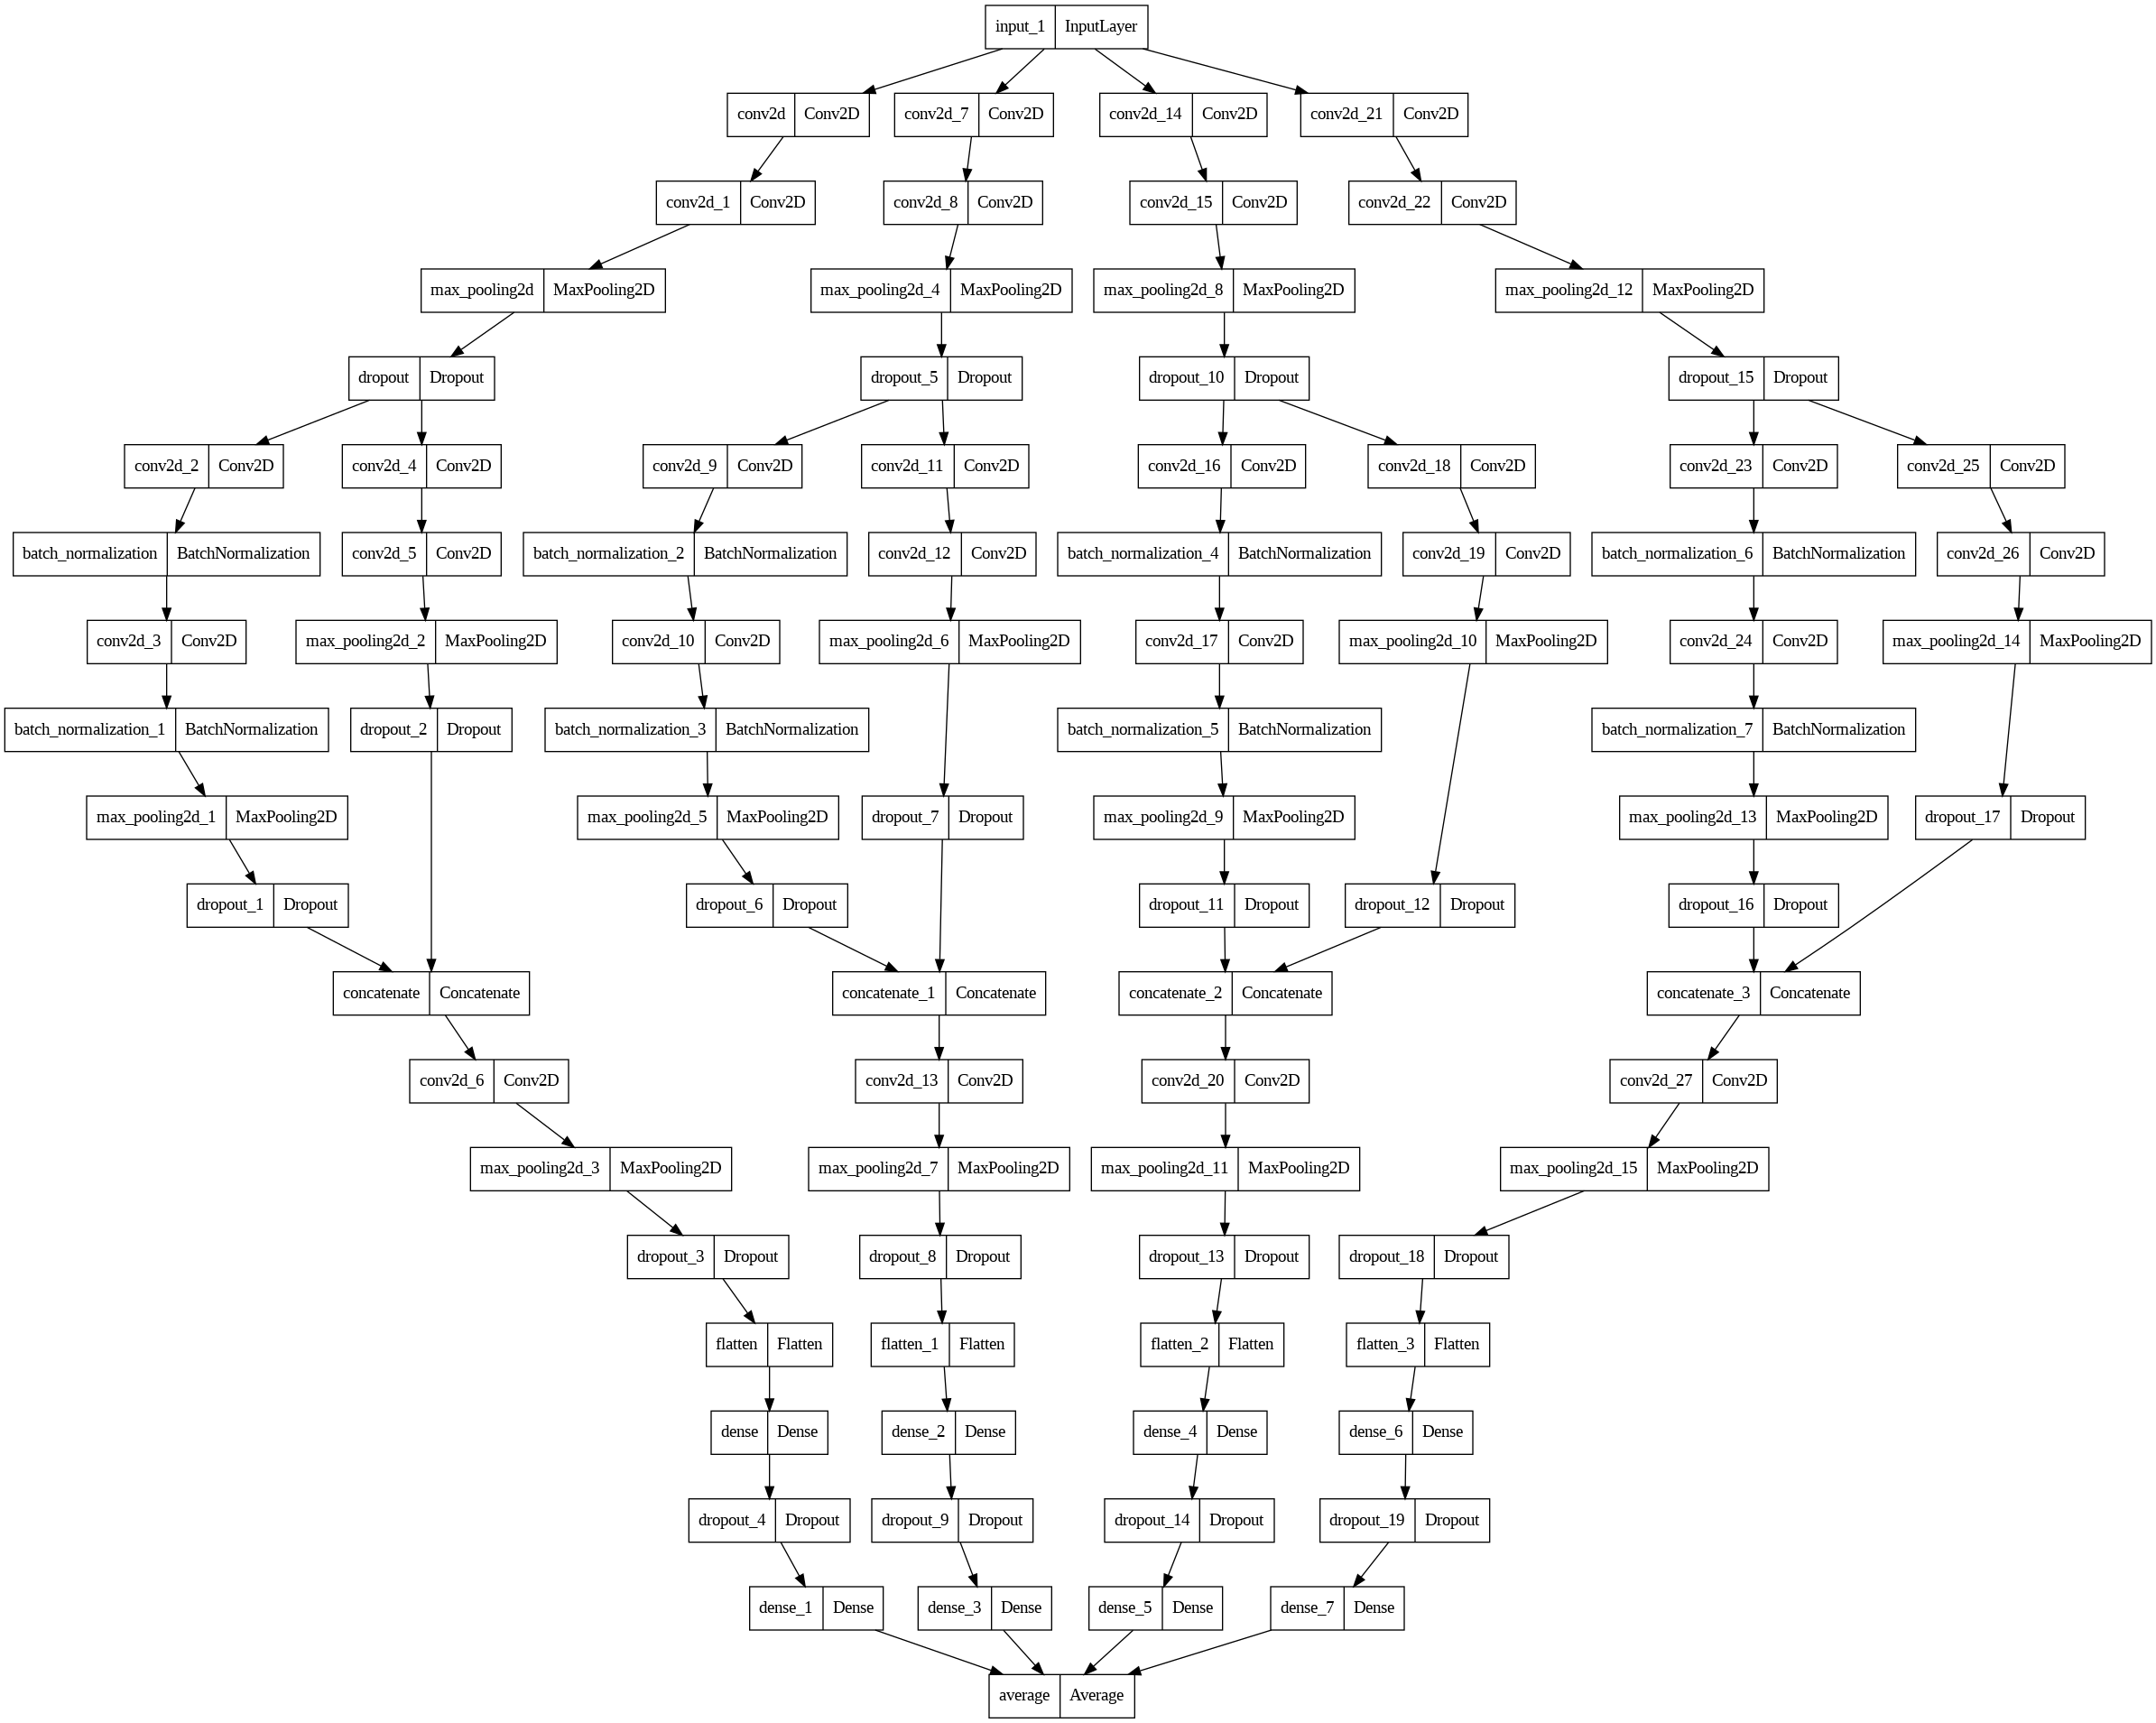

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
## Early Stopping and Model Checking

## Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

## EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, verbose = 1, patience=20, mode = 'auto')

## ModelCheckpoint
mc = ModelCheckpoint(filepath = "./bestmodel.h5", monitor = 'val_accuracy', mode = 'auto', verbose = 1, save_best_only = True)

cb = [es, mc]

In [ ]:
# create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('TRAIN', target_size=(28, 28), batch_size=32, color_mode='grayscale', class_mode='categorical')
val_data = val_datagen.flow_from_directory('VALIDATION', target_size=(28, 28), batch_size=32, color_mode='grayscale', class_mode='categorical')
test_data = test_datagen.flow_from_directory('TEST')


Found 7650 images belonging to 10 classes.
Found 1600 images belonging to 10 classes.
Found 1600 images belonging to 10 classes.


In [ ]:
## Model Training
hs = model.fit(train_data, batch_size=512, epochs=200, verbose=1, validation_data=val_data, callbacks=cb)

Epoch 1/200
240/240 [==============================] - ETA: 0s - loss: 1.8647 - accuracy: 0.3820
Epoch 1: val_accuracy improved from -inf to 0.45875, saving model to ./bestmodel.h5
240/240 [==============================] - 41s 54ms/step - loss: 1.8647 - accuracy: 0.3820 - val_loss: 2.0022 - val_accuracy: 0.4588
Epoch 2/200
240/240 [==============================] - ETA: 0s - loss: 1.1166 - accuracy: 0.6931
Epoch 2: val_accuracy improved from 0.45875 to 0.83375, saving model to ./bestmodel.h5
240/240 [==============================] - 12s 50ms/step - loss: 1.1166 - accuracy: 0.6931 - val_loss: 0.9495 - val_accuracy: 0.8338
Epoch 3/200
239/240 [============================>.] - ETA: 0s - loss: 0.8327 - accuracy: 0.7988
Epoch 3: val_accuracy improved from 0.83375 to 0.89750, saving model to ./bestmodel.h5
240/240 [==============================] - 12s 49ms/step - loss: 0.8321 - accuracy: 0.7992 - val_loss: 0.5375 - val_accuracy: 0.8975
Epoch 4/200
240/240 [==============================]

In [ ]:
# predictions on the test set
test_data = test_datagen.flow_from_directory('TEST', target_size=(28, 28), batch_size=512, color_mode='grayscale', class_mode='categorical', shuffle=False)
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_classes)
print(report)

Found 1600 images belonging to 10 classes.
4/4 [==============================] - 4s 212ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       160
           1       0.98      0.98      0.98       160
           2       1.00      0.99      0.99       160
           3       0.99      0.99      0.99       160
           4       1.00      1.00      1.00       160
           5       0.98      0.99      0.98       160
           6       0.99      0.97      0.98       160
           7       0.99      0.99      0.99       160
           8       0.99      0.99      0.99       160
           9       0.97      0.97      0.97       160

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



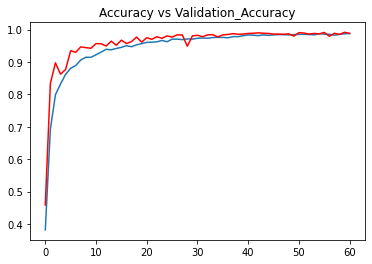

In [ ]:
## Model Graphical Interpretation
h = hs.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title('Accuracy vs Validation_Accuracy')
plt.show()

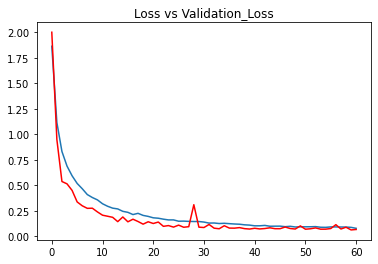

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title('Loss vs Validation_Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[159   0   0   0   0   0   0   1   0   0]
 [  0 157   0   1   0   0   0   0   0   2]
 [  0   2 158   0   0   0   0   0   0   0]
 [  1   0   0 158   0   1   0   0   0   0]
 [  0   0   0   0 160   0   0   0   0   0]
 [  2   0   0   0   0 158   0   0   0   0]
 [  0   0   0   1   0   1 156   0   1   1]
 [  0   0   0   0   0   0   0 159   1   0]
 [  0   0   0   0   0   0   0   0 159   1]
 [  0   2   0   0   0   1   1   0   0 156]]


<AxesSubplot:>

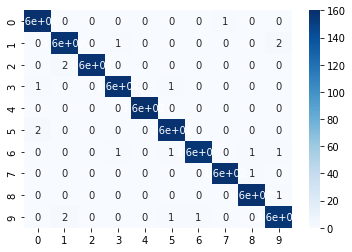

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap="Blues")

In [ ]:
## Model Accuracy
from keras.models import load_model
model = load_model("bestmodel.h5")
acc = model.evaluate_generator(test_data)[1]
print(f" The accuracy of the model is {acc} ")

 The accuracy of the model is 0.9856250286102295 


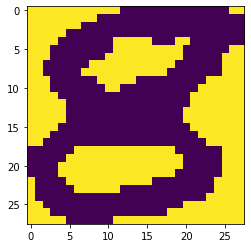

1/1 [==============================] - 0s 285ms/step


In [ ]:
from keras.utils import load_img, img_to_array
path = "TEST/4/bn00364.bmp"
img = load_img(path, target_size = (28,28), color_mode="grayscale")
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)[0][0]

